# Internet Usage Analysis Project

### Qasim Mansoor 19P-0055
### Zulqarnain 19P-0119
### Section 7A

This project is about the Data of internet usage [in kb] by graduate student at an indian university.
We will clean it and analyze it while answering these qustions:

* What is the most frequent internet activity time of the day ?
* How often the ip changes ?
* How often the device changed.
* What is the average usage per hour , per day and per month ?

### 1 - Importing and Cleaning the Data

We start by importing the Data, Cleaning it and making it ready for Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

internet_usage = pd.read_csv('internet_session.csv', parse_dates=['start_time'])

In [2]:
internet_usage

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
0,user1,2022-05-10 02:59:32,00:00:36:28,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout
1,user1,2022-05-10 18:53:27,00:01:49:56,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout
2,user1,2022-05-10 21:20:44,00:01:35:00,10.55.2.253,48:E7:DA:58:22:E9,14080.0,195153.92,209233.92,Idle-Timeout
3,user1,2022-05-11 00:37:42,00:00:26:00,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.4,46049.28,Idle-Timeout
4,user1,2022-05-11 02:59:38,00:00:11:52,10.55.2.253,48:E7:DA:58:22:E9,22067.2,10772.48,32839.68,Idle-Timeout
...,...,...,...,...,...,...,...,...,...
4707,user9,2022-11-04 01:11:34,00:06:54:32,10.55.4.189,DA:2F:97:0E:B7:D0,107960.32,2390753.28,2495610.88,Idle-Timeout
4708,user9,2022-11-04 10:26:09,00:00:23:49,10.55.4.59,DA:2F:97:0E:B7:D0,11407.36,209674.24,221081.60,Idle-Timeout
4709,user9,2022-11-04 20:41:42,00:01:24:13,10.55.15.186,DA:2F:97:0E:B7:D0,18995.2,373657.6,392652.80,Idle-Timeout
4710,user9,2022-11-05 00:21:06,00:08:49:43,10.55.4.159,DA:2F:97:0E:B7:D0,46602.24,593766.4,640368.64,Idle-Timeout


In [4]:
internet_usage.shape

(4712, 9)

This Dataset contains 9 columns and 4712 rows

In [5]:
internet_usage.columns

Index(['name', 'start_time', 'usage_time', 'IP', 'MAC', 'upload', 'download',
       'total_transfer', 'seession_break_reason'],
      dtype='object')

These are the names of the columns, let's make them easier to work with

In [6]:
internet_usage.columns = internet_usage.columns.str.lower()
internet_usage.columns

Index(['name', 'start_time', 'usage_time', 'ip', 'mac', 'upload', 'download',
       'total_transfer', 'seession_break_reason'],
      dtype='object')

Now let's check the data type of the columns

In [7]:
internet_usage.dtypes

name                             object
start_time               datetime64[ns]
usage_time                       object
ip                               object
mac                              object
upload                           object
download                         object
total_transfer                  float64
seession_break_reason            object
dtype: object

A lot of columns are in the wrong data type, we need to fix that

first we will check the null values and drop them if necessary

In [8]:
internet_usage.isna().sum()

name                     0
start_time               0
usage_time               0
ip                       0
mac                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    9
dtype: int64

the column "seession_break_reason" has some null values but since it's a very low amount, we can safely delete them, it won't affect our analysis

In [9]:
internet_usage = internet_usage.dropna().copy()
internet_usage.isna().sum()

name                     0
start_time               0
usage_time               0
ip                       0
mac                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    0
dtype: int64

Now let's check if the dataset contains duplicates and drop them if that's the case

In [10]:
internet_usage.duplicated().sum()

0

No duplicates, so now we can start converting the right columns from strings to numeric

In [11]:
internet_usage['usage_time'] = internet_usage['usage_time'].str.replace('00:', '', 1)
internet_usage['usage_time'] = pd.to_datetime(internet_usage['usage_time'])

internet_usage['upload'] = internet_usage['upload'].str.extract('(\d+)', expand=False)
internet_usage.upload = internet_usage.upload.astype(float)

internet_usage['download'] = internet_usage['download'].str.extract('(\d+)', expand=False)
internet_usage.download = internet_usage.download.astype(float)

device = []
basename = 'device'
mac = internet_usage['mac'][0]
device_number = 1
for i in internet_usage['mac']:
    if i == mac:
        device.append(basename + str(device_number))
    else:
        device_number += 1
        device.append(basename + str(device_number))
        mac = i
internet_usage['device'] = device

internet_usage.dtypes

name                             object
start_time               datetime64[ns]
usage_time               datetime64[ns]
ip                               object
mac                              object
upload                          float64
download                        float64
total_transfer                  float64
seession_break_reason            object
device                           object
dtype: object

Now the columns are in the right data types, we can proceed to the exploratory data analysis

### 2 - Exploratory Data Analysis

We will start with calculating some descriptive statistics

In [12]:
internet_usage.describe(include='all', datetime_is_numeric=True)

,name,start_time,usage_time,ip,mac,upload,download,total_transfer,seession_break_reason,device
count,4703,4703,4703,4703,4703,4.703000e+03,4.703000e+03,4.703000e+03,4703,4703
unique,9,NaN,NaN,1299,33,NaN,NaN,NaN,5,1224
top,user4,NaN,NaN,10.55.0.89,48:E7:DA:58:22:E9,NaN,NaN,NaN,Idle-Timeout,device1206
freq,725,NaN,NaN,80,1235,NaN,NaN,NaN,4350,194
mean,NaN,2022-08-08 09:35:44.875185920,2022-12-18 02:10:05.038486016,NaN,NaN,3.378702e+04,3.966645e+05,4.304372e+05,NaN,NaN
min,NaN,2022-05-09 22:52:41,2022-12-18 00:00:01,NaN,NaN,2.000000e+00,9.000000e+00,1.120000e+00,NaN,NaN
25%,NaN,2022-06-14 18:33:06.500000,2022-12-18 00:31:42,NaN,NaN,6.082000e+03,5.199800e+04,6.187008e+04,NaN,NaN
50%,NaN,2022-08-19 13:56:28,2022-12-18 01:19:40,NaN,NaN,1.531900e+04,1.782680e+05,2.027930e+05,NaN,NaN
75%,NaN,2022-09-24 22:30:58.500000,2022-12-18 02:49:02,NaN,NaN,3.399600e+04,4.593660e+05,4.993997e+05,NaN,NaN
max,NaN,2022-11-05 18:41:14,2022-12-18 22:00:07,NaN,NaN,2.841640e+06,2.790261e+07,2.855272e+07,NaN,NaN


We have 9 users, let's check their count

In [13]:
internet_usage.name.value_counts()

user4    725
user6    674
user1    673
user9    571
user7    526
user3    518
user2    456
user5    335
user8    225
Name: name, dtype: int64

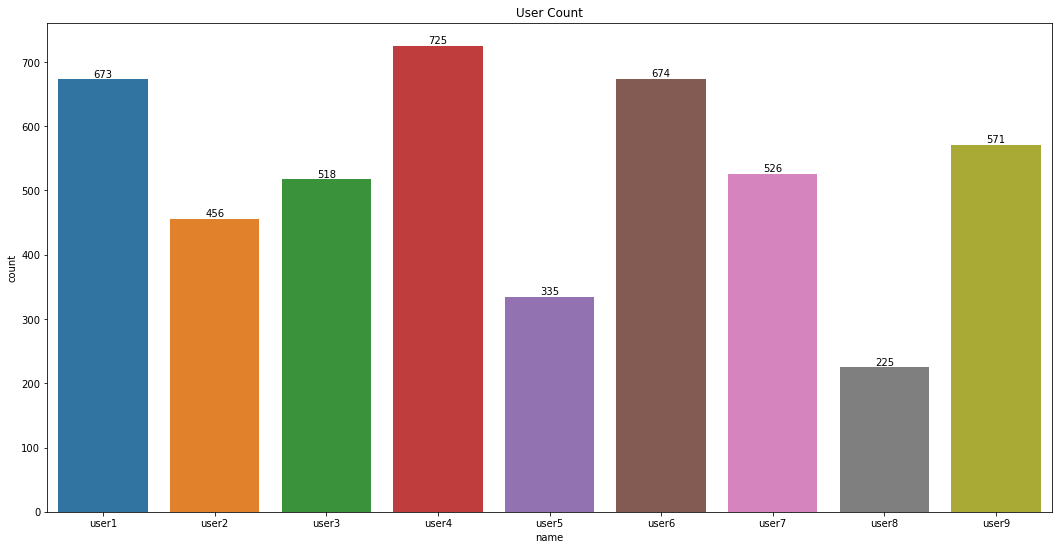

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='name', data=internet_usage)
ax.bar_label(ax.containers[0])
plt.title("User Count")
plt.show()
plt.clf()

User4 is represented the most with a count of 725, while user8 was the least represented with a count of 225

In [15]:
print('The earliest start time is:')
print(internet_usage.start_time.min())
print('The latest start time is:')
print(internet_usage.start_time.max())

The earliest start time is:
2022-05-09 22:52:41
The latest start time is:
2022-11-05 18:41:14


In [16]:
print('The minimum usage time is:')
print(internet_usage.usage_time.min())
print('The maximum usage time is:')
print(internet_usage.usage_time.max())
print('The average usage time is:')
print(internet_usage.usage_time.mean())

The minimum usage time is:
2022-12-18 00:00:01
The maximum usage time is:
2022-12-18 22:00:07
The average usage time is:
2022-12-18 02:10:05.038486016


In [17]:
print('The minimum usage time per user:')
usage_time_minimum = internet_usage.groupby('name').usage_time.min()
usage_time_minimum

The minimum usage time per user:


name
user1   2022-12-18 00:00:18
user2   2022-12-18 00:00:08
user3   2022-12-18 00:00:01
user4   2022-12-18 00:00:45
user5   2022-12-18 00:01:07
user6   2022-12-18 00:00:18
user7   2022-12-18 00:00:20
user8   2022-12-18 00:00:20
user9   2022-12-18 00:00:09
Name: usage_time, dtype: datetime64[ns]

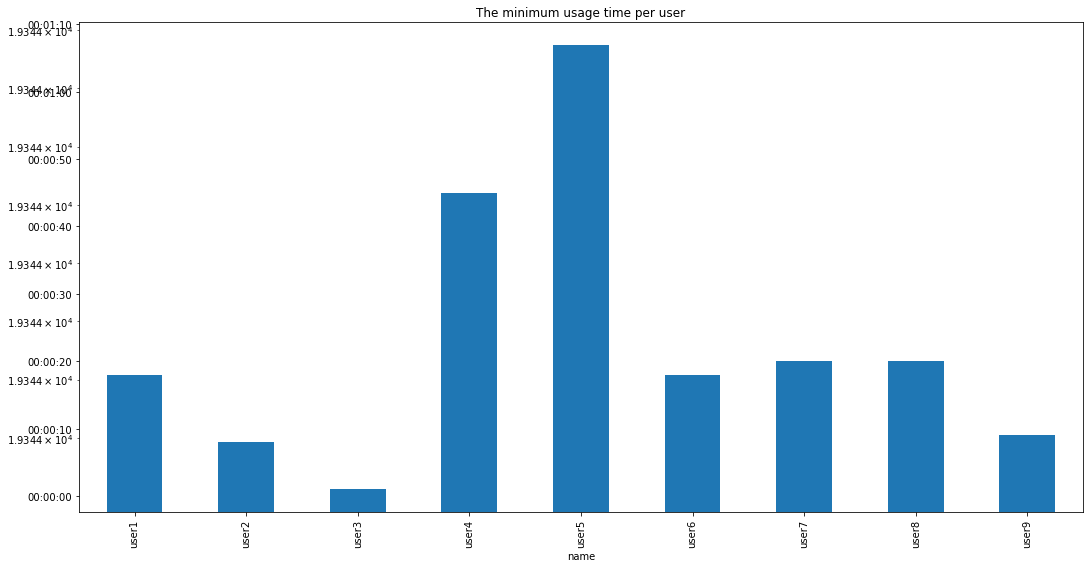

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(18, 9))
usage_time_minimum.plot(kind='bar', logy=True)
plt.title("The minimum usage time per user")
plt.show()
plt.clf()

User 3 has the leat amount of minimum usage with 1 second, while user 5 has the greatest with a minute and 7 seconds

In [19]:
print('The maximum usage time per user:')
usage_time_maximum = internet_usage.groupby('name').usage_time.max()
usage_time_maximum

The maximum usage time per user:


name
user1   2022-12-18 19:35:11
user2   2022-12-18 20:39:52
user3   2022-12-18 17:01:28
user4   2022-12-18 18:11:43
user5   2022-12-18 06:36:11
user6   2022-12-18 19:35:11
user7   2022-12-18 22:00:07
user8   2022-12-18 17:24:26
user9   2022-12-18 19:26:09
Name: usage_time, dtype: datetime64[ns]

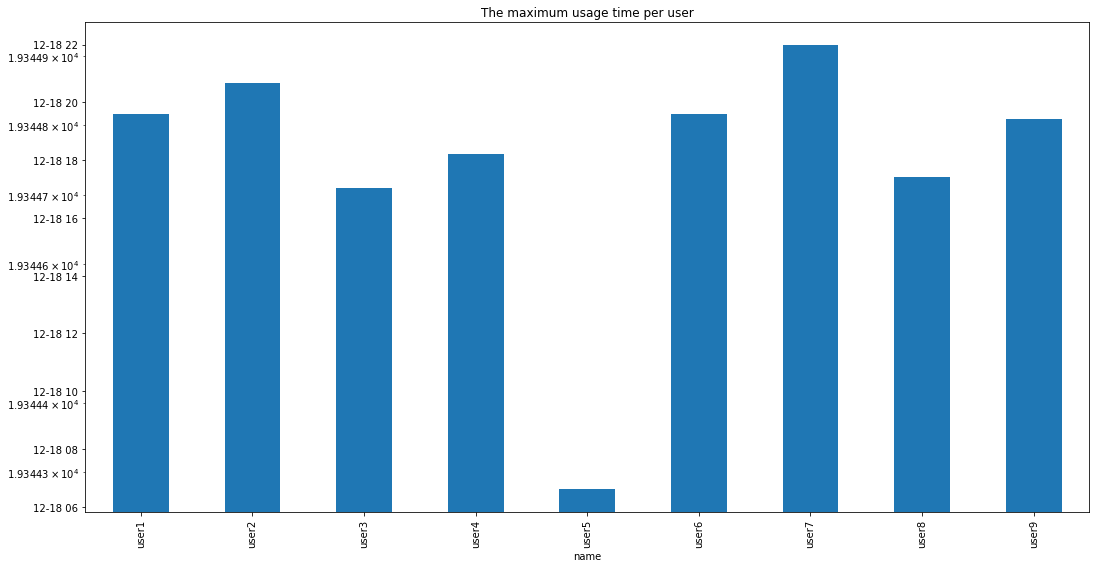

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(18, 9))
usage_time_maximum.plot(kind='bar', logy=True)
plt.title("The maximum usage time per user")
plt.show()
plt.clf()

user 7 has the greatest maximum time usage with 22 hours and 7 seconds, while user 5 has the least amount with only 6 hours 36 minutes and 11 seconds

In [21]:
print('The average usage time per user:')
usage_time_average = internet_usage.groupby('name').usage_time.mean()
usage_time_average

The average usage time per user:


name
user1   2022-12-18 01:42:47.665676032
user2   2022-12-18 01:42:53.866227968
user3   2022-12-18 02:19:42.019305216
user4   2022-12-18 02:38:01.766896640
user5   2022-12-18 01:20:11.701492736
user6   2022-12-18 01:42:49.998516224
user7   2022-12-18 02:17:45.053231872
user8   2022-12-18 04:03:14.555555584
user9   2022-12-18 02:29:32.180385280
Name: usage_time, dtype: datetime64[ns]

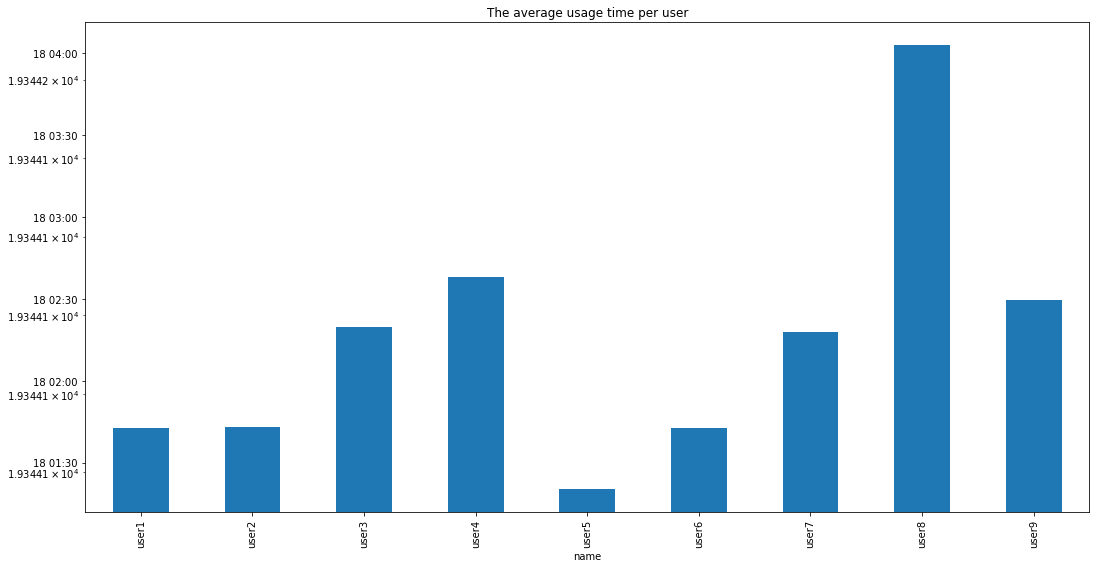

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(18, 9))
usage_time_average.plot(kind='bar', logy=True)
plt.title("The average usage time per user")
plt.show()
plt.clf()

We can see that on average, User 8 has the most usage with 4 hours 3 minutes and 14 seconds, while User 5 has the least amount of average time usage with one hour 20 minutes and 11 seconds

In [23]:
internet_usage.ip.value_counts()

10.55.0.89      80
10.55.14.148    64
10.55.15.221    55
10.55.1.50      48
10.55.10.46     44
                ..
10.55.15.44      1
10.55.15.237     1
10.55.14.166     1
10.55.3.200      1
10.55.4.159      1
Name: ip, Length: 1299, dtype: int64

The most used IP Address is 10:55:0:89

In [24]:
internet_usage.device.value_counts()

device1206    194
device835     137
device11      137
device1212    132
device312     113
             ... 
device582       1
device583       1
device584       1
device585       1
device613       1
Name: device, Length: 1224, dtype: int64

The most used device is device1206 with 194 times

In [25]:
print('The minimum upload is: ' + str(internet_usage.upload.min()) + 'Kb')
print('The maximum upload is: ' + str(internet_usage.upload.max()) + 'Kb')
print('The average upload is: ' + str(round(internet_usage.upload.mean(), 2)) + 'Kb')

The minimum upload is: 2.0Kb
The maximum upload is: 2841640.0Kb
The average upload is: 33787.02Kb


Now let's check the minimum, maximum and average upload per user

We will start with the minimum upload per user

In [26]:
print('The minimum upload per user:')
internet_usage.groupby('name').upload.min()

The minimum upload per user:


name
user1     19.0
user2     23.0
user3     36.0
user4     56.0
user5    382.0
user6     19.0
user7      2.0
user8      4.0
user9     41.0
Name: upload, dtype: float64

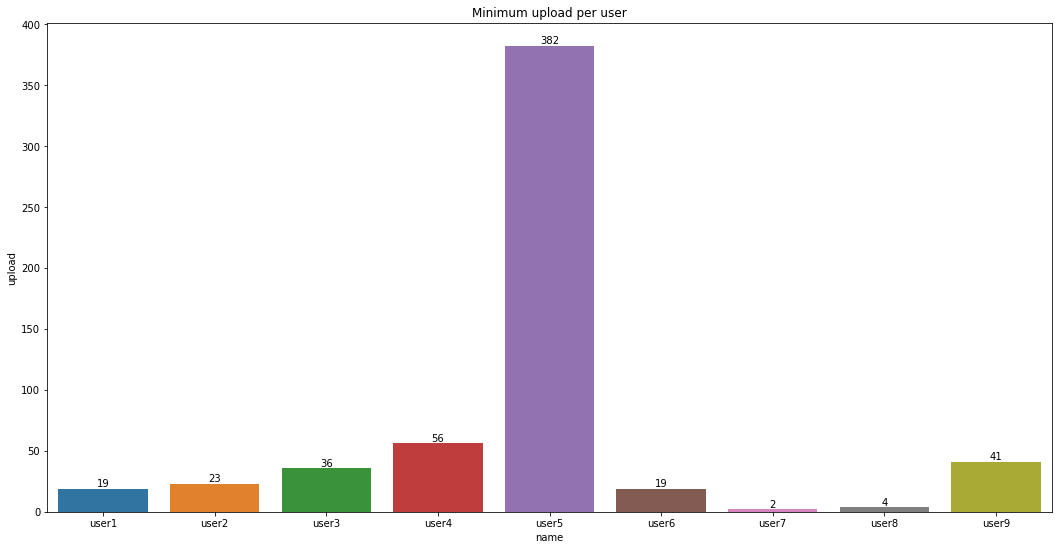

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='upload' , data=internet_usage, ci=None, estimator=np.min)
ax.bar_label(ax.containers[0])
plt.title("Minimum upload per user")
plt.show()
plt.clf()

user 2 has the lowest minimum upload with 2Kb while user5 has the highest minimum upload with 382Kb

Now we check the maximum upload per user

In [28]:
print('The maximum upload per user:')
internet_usage.groupby('name').upload.max()

The maximum upload per user:


name
user1     638566.0
user2     379955.0
user3    1625292.0
user4     754462.0
user5    2841640.0
user6     638566.0
user7     653731.0
user8     709058.0
user9    1352663.0
Name: upload, dtype: float64

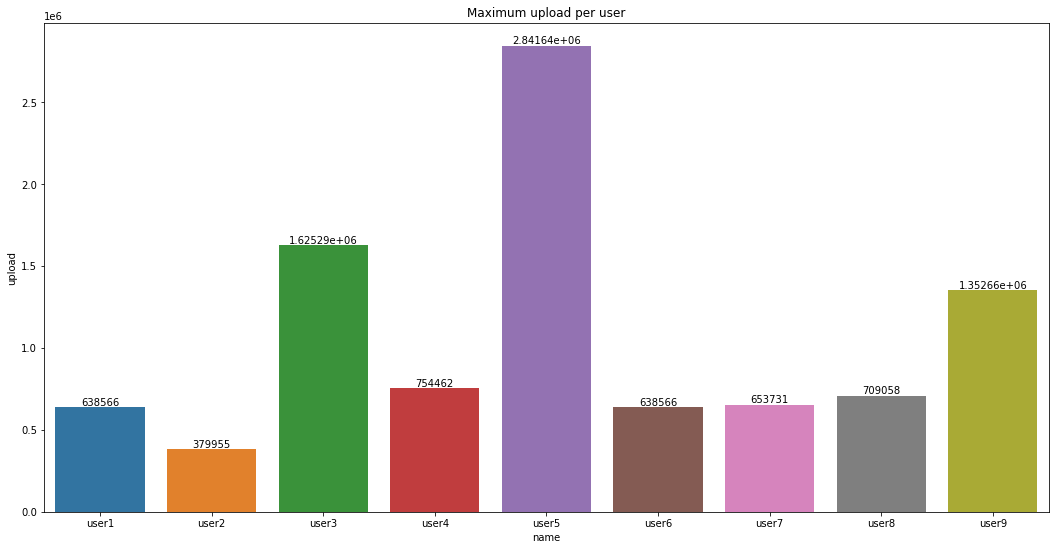

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='upload' , data=internet_usage, ci=None, estimator=np.max)
ax.bar_label(ax.containers[0])
plt.title("Maximum upload per user")
plt.show()
plt.clf()

User 5 has the highest maximum upload with 2841640Kb with user 2 having the lowest of maximum upload with 379955Kb

We will check the average upload per user

In [30]:
print('The average upload per user:')
round(internet_usage.groupby('name').upload.mean(), 2)

The average upload per user:


name
user1    27291.34
user2    29188.79
user3    29594.88
user4    33783.74
user5    64500.35
user6    27700.73
user7    23075.54
user8    59190.12
user9    37944.66
Name: upload, dtype: float64

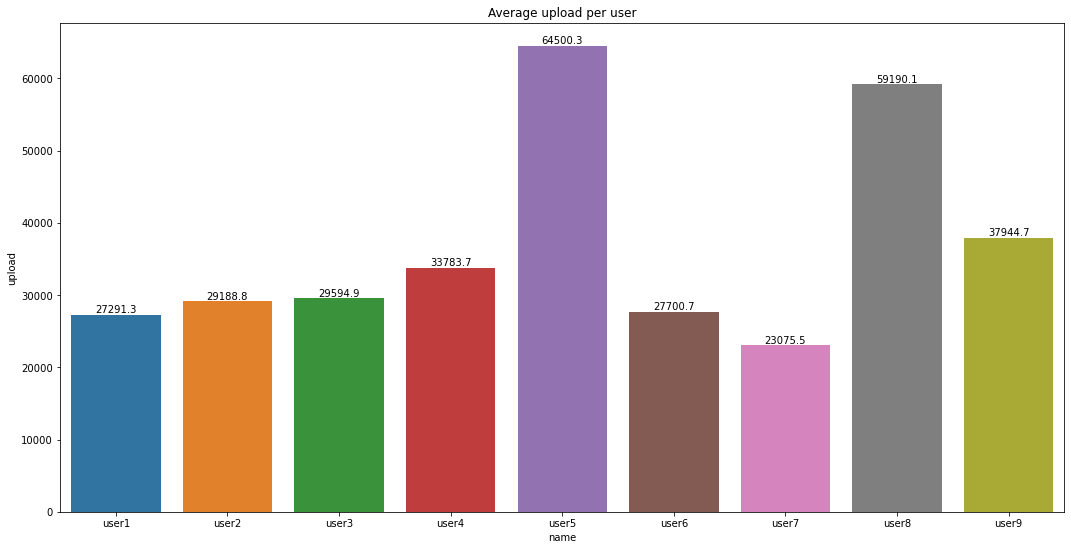

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='upload' , data=internet_usage, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average upload per user")
plt.show()
plt.clf()

User5 has the highest average upload with 64500.35Kb while User 7 has the lower average with 23075.54Kb

Now we will do the same but with the download, so calculating minimum, maximum and average total, and after that per user

In [32]:
print('The minimum download is: ' + str(internet_usage.download.min()) + 'Kb')
print('The maximum download is: ' + str(internet_usage.download.max()) + 'Kb')
print('The average download is: ' + str(round(internet_usage.download.mean(), 2)) + 'Kb')

The minimum download is: 9.0Kb
The maximum download is: 27902607.0Kb
The average download is: 396664.52Kb


Now per the download per user

In [33]:
print('The minimum download per user:')
internet_usage.groupby('name').download.min()

The minimum download per user:


name
user1     50.0
user2     49.0
user3     60.0
user4     12.0
user5    461.0
user6     50.0
user7      9.0
user8     13.0
user9     61.0
Name: download, dtype: float64

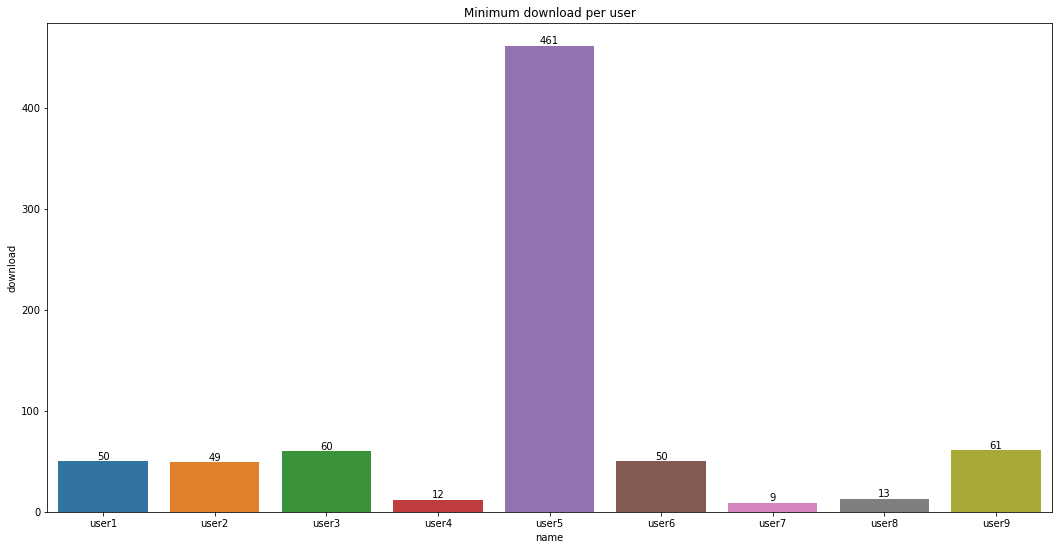

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='download' , data=internet_usage, ci=None, estimator=np.min)
ax.bar_label(ax.containers[0])
plt.title("Minimum download per user")
plt.show()
plt.clf()

User 5 has the highest minimum download with 461Kb while User 7 has the lowest with 9Kb

In [35]:
print('The maximum download per user:')
internet_usage.groupby('name').download.max()

The maximum download per user:


name
user1    23760732.0
user2    21831352.0
user3     3145728.0
user4     8325693.0
user5     5033164.0
user6    23760732.0
user7    27902607.0
user8     2747269.0
user9     6008340.0
Name: download, dtype: float64

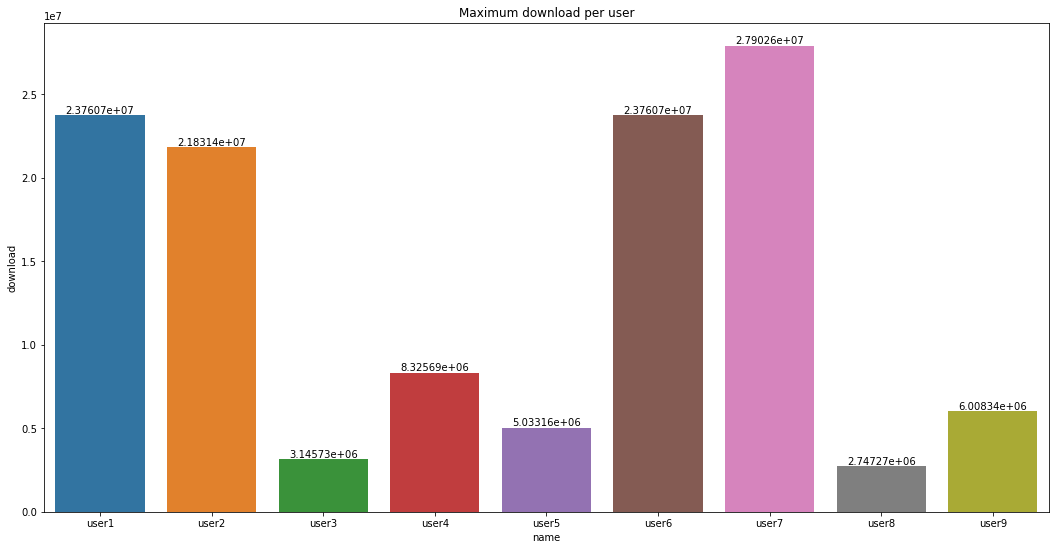

<Figure size 432x288 with 0 Axes>

In [36]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='download' , data=internet_usage, ci=None, estimator=np.max)
ax.bar_label(ax.containers[0])
plt.title("Maximum download per user")
plt.show()
plt.clf()

User 7 has the highest maximum download with 27902607Kb while user 8 has the lowest with 2747269Kb

In [37]:
print('The average download per user:')
round(internet_usage.groupby('name').download.mean(), 2)

The average download per user:


name
user1    270725.96
user2    573798.02
user3    342230.37
user4    408580.26
user5    357278.08
user6    270545.18
user7    453828.61
user8    341417.12
user9    578981.51
Name: download, dtype: float64

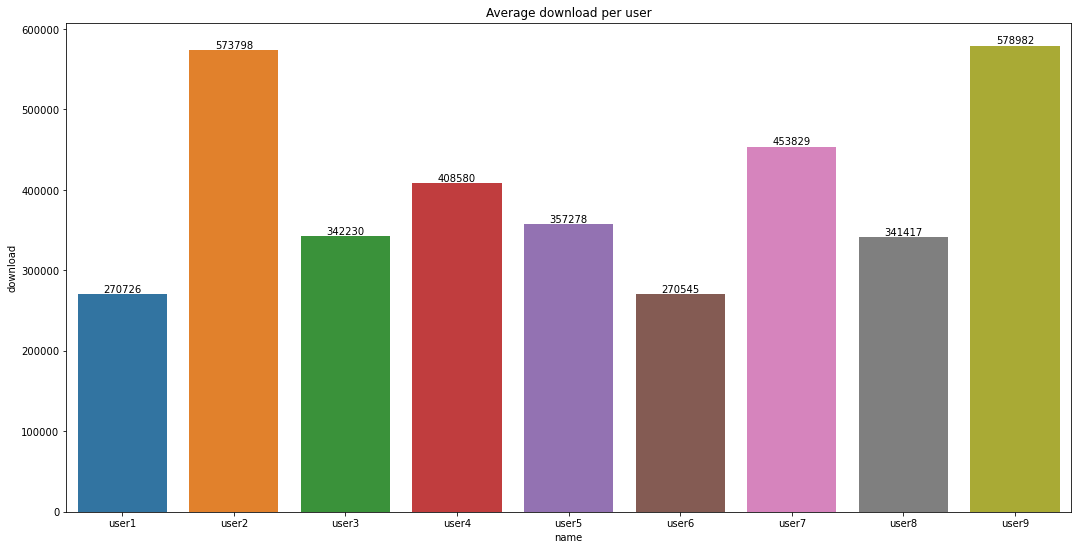

<Figure size 432x288 with 0 Axes>

In [38]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='download' , data=internet_usage, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average download per user")
plt.show()
plt.clf()

User 9 has the highest average download with 578982.51Kb while user 6 has the lowest with 270545.18Kb

We will repeat all that with the total transfer column, minimum, maximum and average and than doing the same with each user

In [39]:
print('The minimum total transfer is: ' + str(internet_usage.total_transfer.min()) + 'Kb')
print('The maximum total transfer is: ' + str(internet_usage.total_transfer.max()) + 'Kb')
print('The average total transfer is: ' + str(round(internet_usage.total_transfer.mean(), 2)) + 'Kb')

The minimum total transfer is: 1.12Kb
The maximum total transfer is: 28552724.48Kb
The average total transfer is: 430437.21Kb


In [40]:
print('The minimum total transfer per user:')
internet_usage.groupby('name').total_transfer.min()

The minimum total transfer per user:


name
user1     75.34
user2     73.13
user3      1.12
user4     13.45
user5    924.40
user6     75.34
user7     15.25
user8     18.08
user9    102.64
Name: total_transfer, dtype: float64

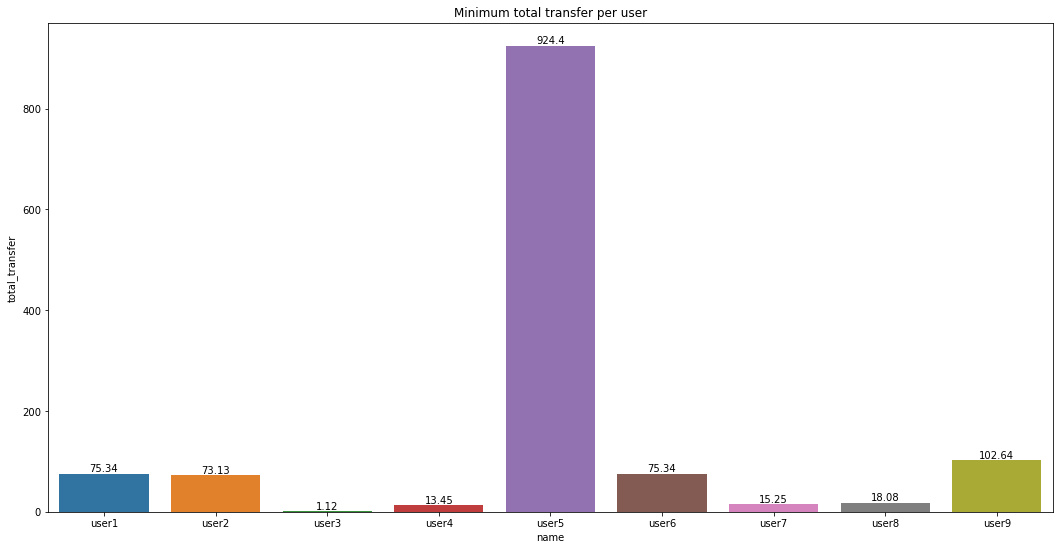

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='total_transfer' , data=internet_usage, ci=None, estimator=np.min)
ax.bar_label(ax.containers[0])
plt.title("Minimum total transfer per user")
plt.show()
plt.clf()

User 5 has the highest minimum total transfer with 924.4Kb while user 3 has the lowest with 1.12Kb

In [42]:
print('The maximum total transfer per user:')
internet_usage.groupby('name').total_transfer.max()

The maximum total transfer per user:


name
user1    24389877.76
user2    22051553.28
user3     3282042.88
user4     8524922.88
user5     5158993.92
user6    24389877.76
user7    28552724.48
user8     3166699.52
user9     6155141.12
Name: total_transfer, dtype: float64

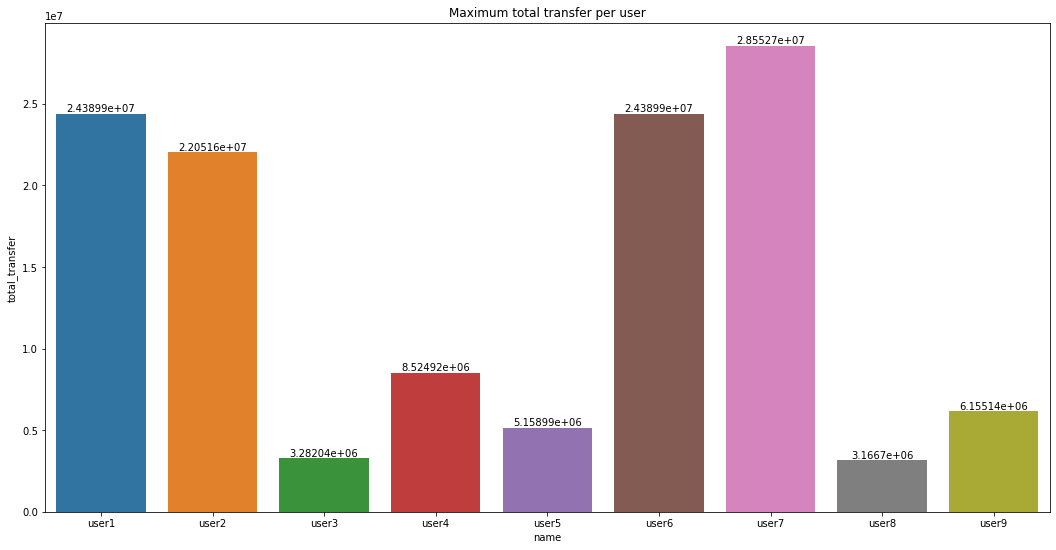

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='total_transfer' , data=internet_usage, ci=None, estimator=np.max)
ax.bar_label(ax.containers[0])
plt.title("Maximum total transfer per user")
plt.show()
plt.clf()

User 7 has the highest maximum total transfer with 28552724.48Kb while user 8 has the lowest with 3166699.52Kb

In [44]:
print('The average total transfer per user:')
round(internet_usage.groupby('name').total_transfer.mean(), 2)

The average total transfer per user:


name
user1    297971.21
user2    602904.19
user3    371826.53
user4    442413.51
user5    421772.04
user6    298199.88
user7    476923.04
user8    400682.28
user9    616875.57
Name: total_transfer, dtype: float64

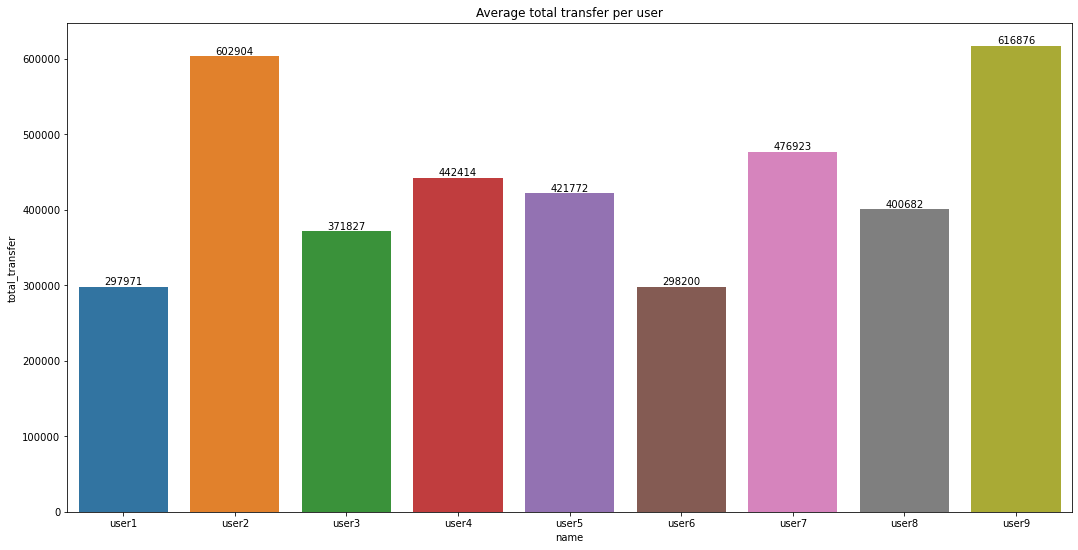

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize=(18, 9))
ax = sns.barplot(x='name', y='total_transfer' , data=internet_usage, ci=None, estimator=np.mean)
ax.bar_label(ax.containers[0])
plt.title("Average total transfer per user")
plt.show()
plt.clf()

User 9 has the highest average total transfer with 616875.57Kb while user 1 has the lowest with 297971.21Kb

In [46]:
internet_usage.seession_break_reason.value_counts()

Idle-Timeout    4350
Lost-Carrier     162
Lost-Service     124
User-Request      65
NAS-Reboot         2
Name: seession_break_reason, dtype: int64

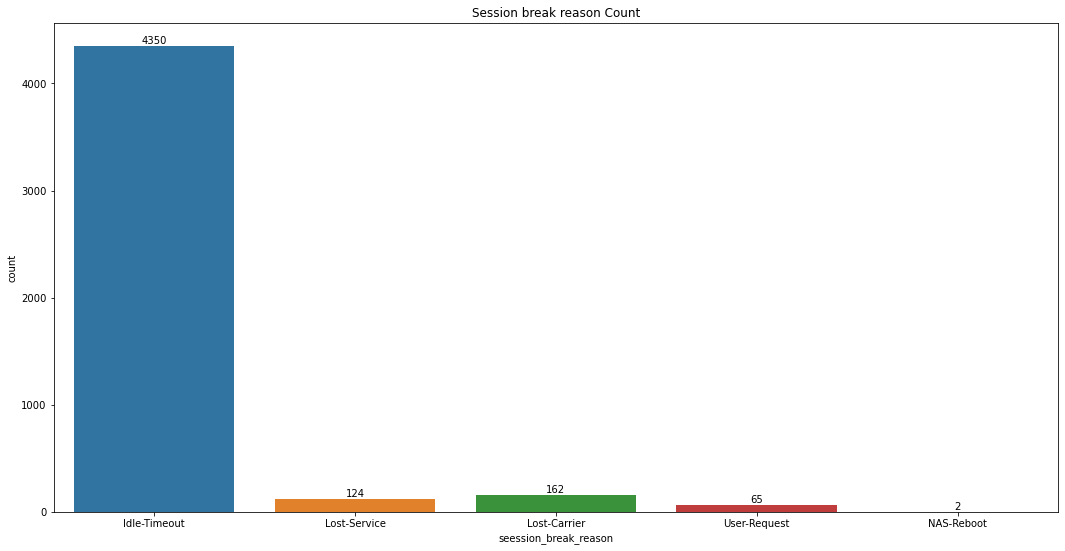

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='seession_break_reason' , data=internet_usage)
ax.bar_label(ax.containers[0])
plt.title("Session break reason Count")
plt.show()
plt.clf()

The majority of the session break reasons were from "Idle-Timeout" with 4350 times, while the other reasons have very low occurrences in comparison, with "NAS-Reboot" having the lowest with only 2 occurrences

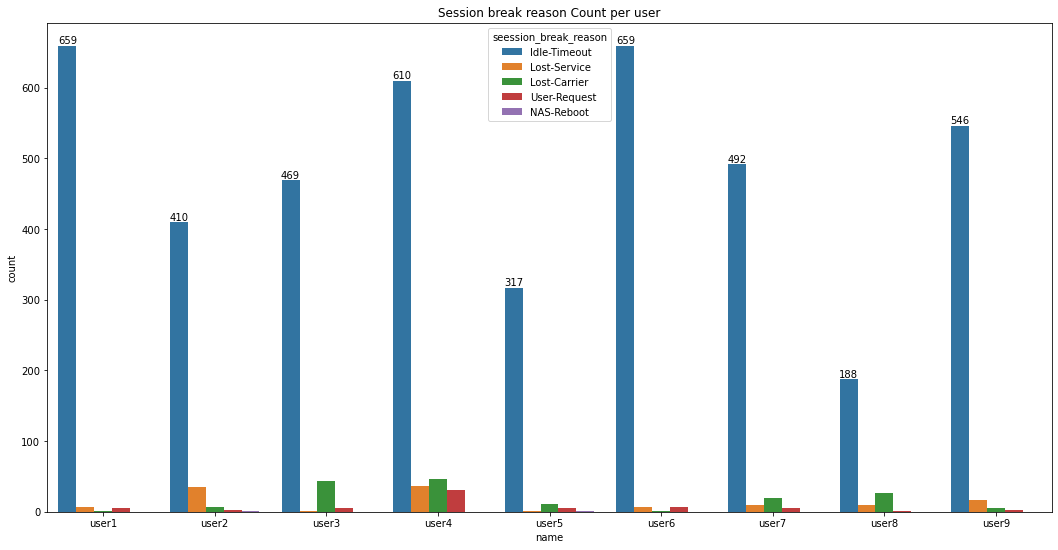

<Figure size 432x288 with 0 Axes>

In [48]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='name', hue = 'seession_break_reason' , data=internet_usage)
ax.bar_label(ax.containers[0])
plt.title("Session break reason Count per user")
plt.show()
plt.clf()

If we check the session break reasons count per user, it's the same thing, the majority are from "Idle-Timeout" while the other reasons have very low occurrences

### 3 - Deeper Analysis

Now that we finished with the EDA, we can go deeper into our analysis and answer the questions asked earlier

We will start with this question:
* What is the most frequent internet activity time of the day ?

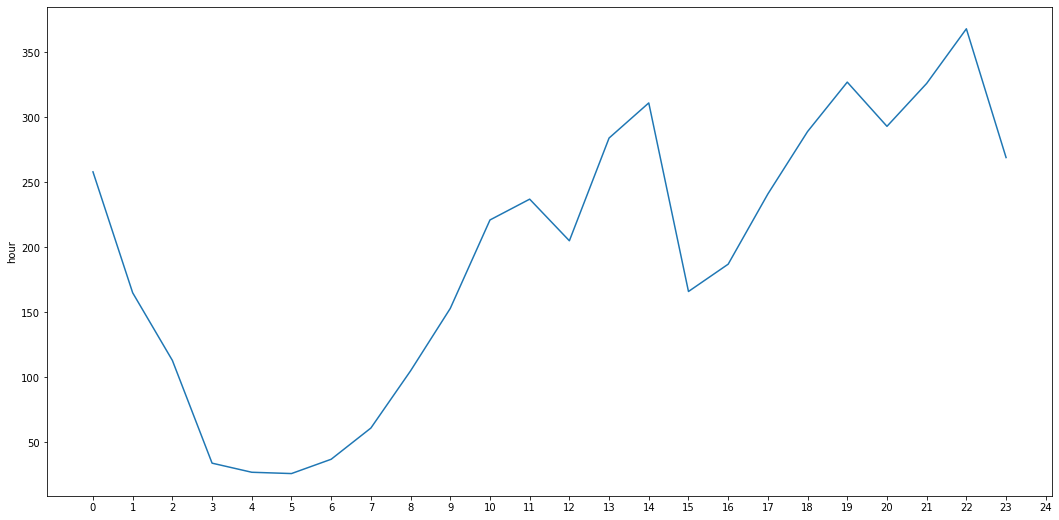

<Figure size 432x288 with 0 Axes>

In [49]:
internet_usage['hour'] = pd.to_datetime(internet_usage['start_time']).dt.hour
frequent_activity_time_of_day = internet_usage['hour'].value_counts().sort_index()
plt.figure(figsize=(18, 9))
sns.lineplot(data=frequent_activity_time_of_day)
plt.xticks(np.linspace(start=0, stop=24, num=25))
plt.show()
plt.clf()

The most frequent internet activity time of the day is 22h or 10pm

Now we answer this question:
* How often the ip changes ?

In [50]:
base_ip = '48:E7:DA:58:22:E9'
ip_count = 0
for i in range(1, internet_usage.shape[0]):
    if internet_usage.iloc[i]['ip'] != base_ip:
        ip_count +=1
        base_ip = internet_usage.iloc[i]['ip']

print('The IP Adress changed ' + str(ip_count) + ' times') 

The IP Adress changed 2303 times


Now we answer this question :
* How often the device changed.

In [51]:
base_device = 'device1'
device_count = 0
for i in range(1, internet_usage.shape[0]):
    if internet_usage.iloc[i]['device'] != base_device:
        device_count +=1
        base_device = internet_usage.iloc[i]['device']

print('The device changed ' + str(device_count) + ' times') 

The device changed 1223 times


Now we answer the final question:
* What is the average usage per hour , per day and per month ?

We start with the average usage per hour

In [52]:
internet_usage.reset_index(inplace=True)

internet_usage['day'] = internet_usage['start_time'].dt.day
internet_usage['month'] = internet_usage['start_time'].dt.month

hourly_average = internet_usage.groupby('hour').total_transfer.mean()
print('The Average usage per hour is:\n ' +  str(round(hourly_average, 2)))

The Average usage per hour is:
 hour
0     464530.44
1     530880.86
2     431576.11
3     345303.34
4     359809.44
5     275960.91
6     468959.59
7     292886.83
8     366681.92
9     377480.64
10    393259.12
11    309492.45
12    310137.98
13    335270.58
14    472403.71
15    517005.11
16    403919.40
17    525423.69
18    666590.76
19    389841.79
20    355862.80
21    474038.34
22    449600.50
23    407785.08
Name: total_transfer, dtype: float64


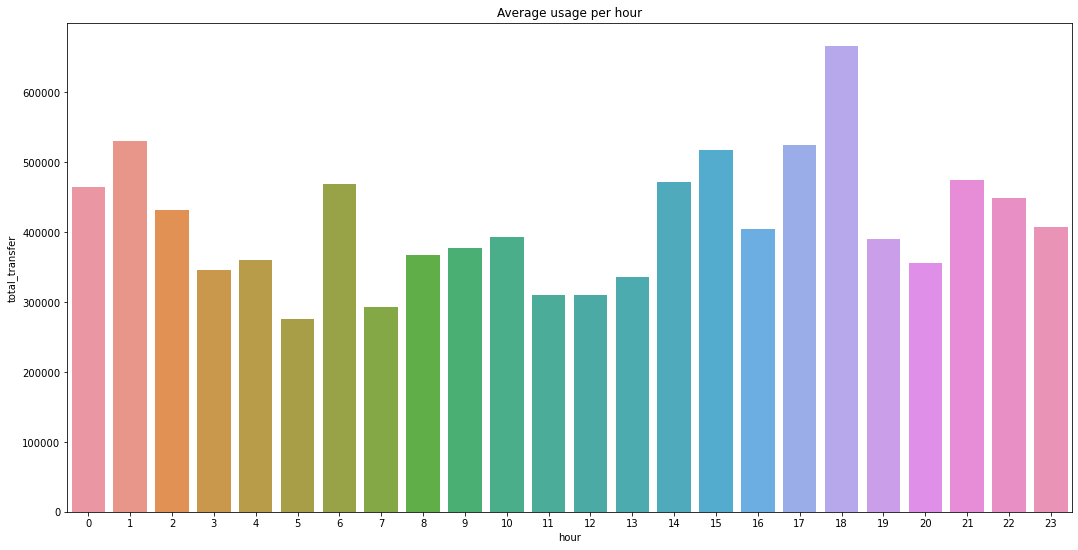

<Figure size 432x288 with 0 Axes>

In [53]:
plt.figure(figsize=(18, 9))
sns.barplot(x='hour', y='total_transfer' , data=internet_usage, ci=None, estimator=np.mean)
plt.title("Average usage per hour")
plt.show()
plt.clf()

And now we see the average usage per day

In [54]:
daily_average = internet_usage.groupby('day').total_transfer.mean()
print('The Average usage per day is:\n ' +  str(round(daily_average, 2)))

The Average usage per day is:
 day
1     396705.04
2     494496.48
3     445865.63
4     676332.03
5     652195.66
6     396261.75
7     402259.89
8     301859.57
9     393521.97
10    350665.02
11    729857.65
12    346695.95
13    501906.70
14    352701.10
15    521520.51
16    426719.39
17    475795.71
18    337490.93
19    301941.32
20    365130.12
21    462211.69
22    486595.37
23    383153.93
24    320598.94
25    443689.47
26    463432.02
27    324318.12
28    494576.34
29    363645.61
30    361418.88
31    369118.01
Name: total_transfer, dtype: float64


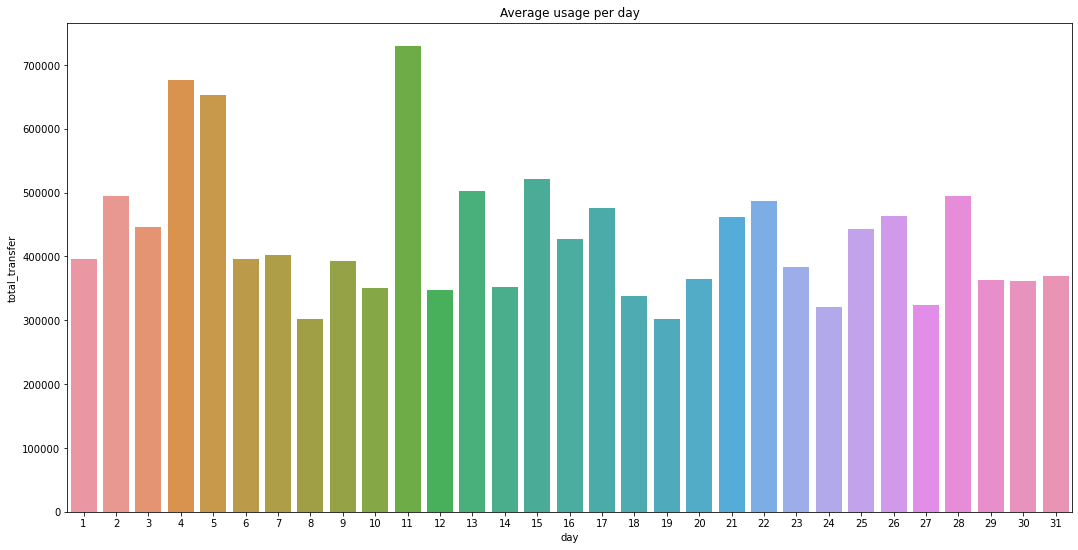

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(18, 9))
sns.barplot(x='day', y='total_transfer' , data=internet_usage, ci=None, estimator=np.mean)
plt.title("Average usage per day")
plt.show()
plt.clf()

And now the average usage per month

In [56]:
monthly_average = internet_usage.groupby('month').total_transfer.mean()
print('The Average usage per month is:\n ' +  str(round(monthly_average, 2)))

The Average usage per month is:
 month
5     311177.16
6     338418.08
7     418583.99
8     479042.44
9     482955.52
10    549467.63
11    399804.11
Name: total_transfer, dtype: float64


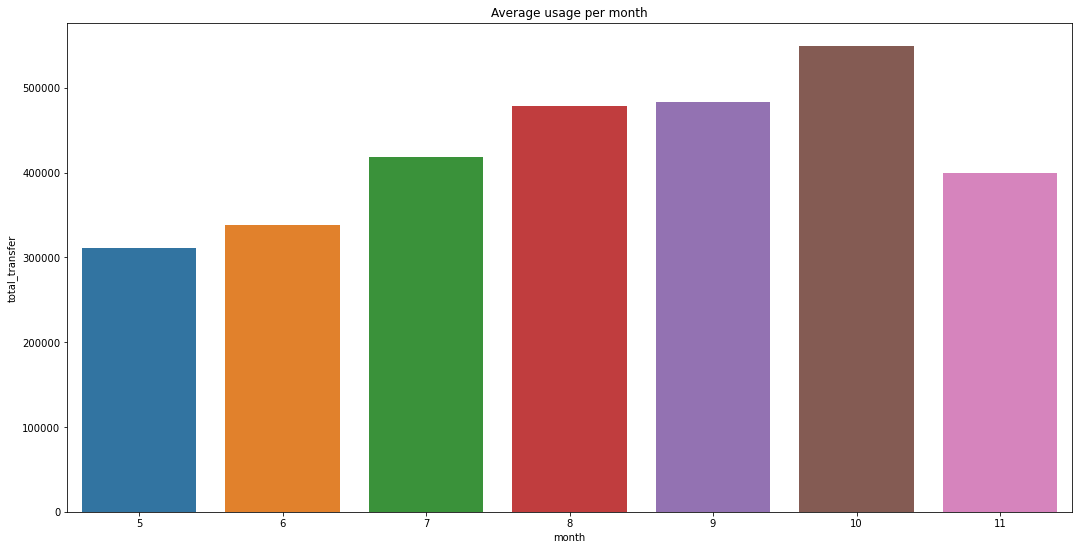

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure(figsize=(18, 9))
sns.barplot(x='month', y='total_transfer' , data=internet_usage, ci=None, estimator=np.mean)
plt.title("Average usage per month")
plt.show()
plt.clf()

# Machine Learning

Here we will try to use the hour when a user starts using the internet, the number of hours a user uses the internet for, the download size, upload size and the total transfer size to predict the reason for a session break.

In [63]:
df2 = internet_usage[['start_time','usage_time','upload','download','total_transfer']].copy()

In [64]:
df2['usage_time_hours'] = pd.to_datetime(internet_usage['usage_time']).dt.hour
df2['start_time_hours'] = pd.to_datetime(internet_usage['start_time']).dt.hour
df2['session_break_reason'] = internet_usage['seession_break_reason'].copy()

In [65]:
df2['session_break_reason'].unique()

array(['Idle-Timeout', 'Lost-Service', 'Lost-Carrier', 'User-Request',
       'NAS-Reboot'], dtype=object)

In [67]:
enco = {"session_break_reason": {"Idle-Timeout":0,"Lost-Service":1,"Lost-Carrier":2,"User-Request":3,"NAS-Reboot":4}}
df2 = df2.replace(enco)

We are encoding the 4 types of session break reason to integer values that can be passed to a machine learning algorithm.

In [70]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df2[['upload','download','total_transfer','usage_time_hours','start_time_hours']]
y = df2['session_break_reason']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
regress = LinearRegression()
regress.fit(X_train,y_train)

LinearRegression()

In [72]:
#Evaluate Model Performance
cof = regress.score(X_test, y_test)

#Mean Squared Error
from sklearn.metrics import mean_squared_error
y_pred = regress.predict(X_test)
MSE = mean_squared_error(y_pred,y_test)

print(f'Coefficient of Score:{cof}\nMean Squared Error:{MSE}')

Coefficient of Score:-0.004950122350581898
Mean Squared Error:0.2315432611483798


### 3 - Conclusion

In this project we had a dataset about the internet usage [in kb] by graduate students at an indian university.
We imported the data, cleaned it, analyzed it and answered the questions asked

The dataset contains 9 users that used 1224 difference devices to connect to the internet while uploading 2841640.0Kb and downloading 27902607.0Kb with a total transfer of 28552724.48Kb during a period of 7 months

The most frequent internet activity time of the day is 22h or 10pm

The IP Adress changed 2303 times while the devices used changed 1223 times

The highest average usage per hour was 666590.76Kb around18h or 6pm, the highest average usage per day was 729857.65Kb around the 11th day of the month, while the highest average usage per month was during the month of October with 549467.63Kb total transfer of data.

Finally, the prediction model defines that the reason for a session break is not dependent on the hour when a user starts using the internet, the number of hours a user uses the internet for, the download size, upload size and the total transfer size to predict the reason for a session break.